# 项目9 基于k-means算法的聚类模型

## 项目实训

### k-means算法应用及效果展示

#### 任务目标：调用k-means算法对生成的数据集进行聚类，对聚类效果进行展示。

##### 1．生成训练集

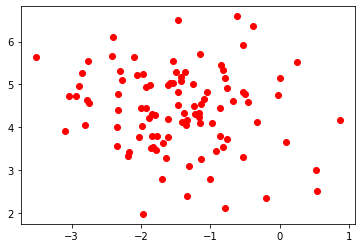

In [1]:
import matplotlib.pyplot as plt
#导入数据集生成工具
from sklearn.datasets import make_blobs
#生成分类数为1的数据集
blobs = make_blobs(random_state=1,centers=1)
X_blobs = blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r')
plt.show()

##### 2．用k-means算法将这些数据聚为3类，并绘制聚类效果

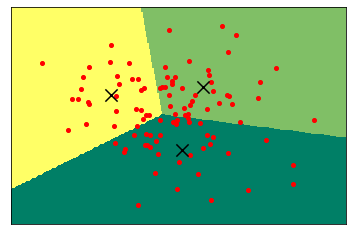

In [2]:
import numpy as np
#导入KMeans工具
from sklearn.cluster import KMeans
#将数据聚为3类
kmeans = KMeans(n_clusters=3)
#拟合数据
kmeans.fit(X_blobs)

#下面是用来画聚类效果图的代码
x_min,x_max=X_blobs[:,0].min() -0.5,X_blobs[:,0].max()+0.5
y_min,y_max=X_blobs[:,1].min() -0.5,X_blobs[:,1].max()+0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max, .02),
                    np.arange(y_min,y_max, .02))
Z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z,interpolation='nearest',
          extent = (xx.min(),xx.max(),yy.min(),yy.max()),
          cmap=plt.cm.summer,
          aspect='auto',origin='lower')

plt.plot(X_blobs[:,0],X_blobs[:,1],'r.',markersize=8)
#获取聚类的质心
centroids = kmeans.cluster_centers_
#用黑色叉号表示聚类的质心
plt.scatter(centroids[:,0],centroids[:,1],
           marker='x',s=150,linewidths=3,
           color='black',zorder=10)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
plt.show()

##### 3．输出k-means聚类的标签

In [3]:
#输出k-means聚类的标签
print('k-means的聚类标签:\n{}'.format(kmeans.labels_))

k-means的聚类标签:
[0 0 2 1 1 1 0 0 2 1 0 1 0 2 0 1 1 0 2 2 1 2 0 0 0 0 1 0 0 0 2 2 0 0 1 2 1
 2 0 2 1 0 2 2 1 1 1 0 2 0 2 0 1 2 1 1 2 1 1 0 1 2 1 0 2 1 2 2 0 1 1 0 1 1
 1 0 1 0 0 2 1 2 1 1 2 0 1 0 2 2 1 0 2 2 1 1 0 1 1 0]


### k-means算法实现鸢尾花数据的聚类

#### 任务目标：使用scikit-learn内置的iris数据集，选取数据的后两个特征，即花瓣长度和花瓣宽度作为训练数据，根据绘制的鸢尾花数据分布图尝试对数据进行聚类，并绘制出手肘图，进一步给出k值的合理性。

##### 1．导入iris数据集

In [4]:
import matplotlib.pyplot as plt  
import numpy as np
#导入k-means工具
from sklearn.cluster import KMeans
from sklearn import datasets
#导入鸢尾花数据集
from sklearn.datasets import load_iris
iris=load_iris()
#我们只取特征空间中的后两个维度
X = iris.data[:, 2:4]
#输出特征数据的维度
print(X.shape)

(150, 2)


##### 2．绘制鸢尾花数据分布图

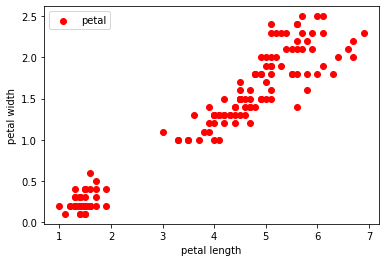

In [5]:
#绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c = "red", marker='o', label='petal')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()

##### 3．将鸢尾花数据聚为3类

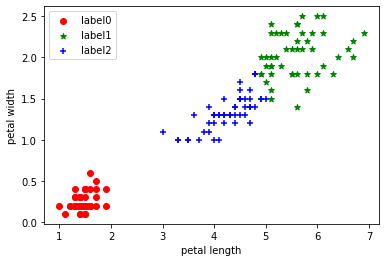

In [6]:
#构造聚类器，将数据聚为3类
kmeans = KMeans(n_clusters=3)
#拟合数据
kmeans.fit(X)
#获取聚类标签
label_pred = kmeans.labels_ 
#绘制聚类效果图
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  

##### 4．绘制鸢尾花数据的手肘图

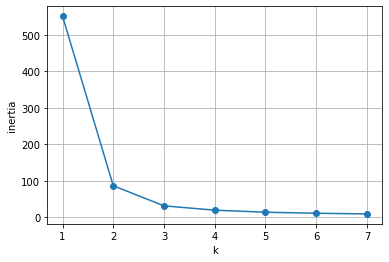

In [9]:
Inertia=[]  #存储k值对应的簇内距离平方和
for i in range(1,8):    #k取值1~8，做k-means聚类
    km=KMeans(n_clusters=i)
    km.fit(X)
    Inertia.append(km.inertia_)  #inertia_属性获取簇内距离平方和
    
plt.xlabel('k')
plt.ylabel('inertia')
plt.plot(range(1, 8),Inertia,'o-')
plt.grid(True)
plt.show()

## 项目拓展—航空公司客户价值分析

#### 目标：使用航空公司客户数据，结合客户价值分析模型，采用k-means算法，对客户进行分群，比较不同类别客户的客户价值。

#### 客户价值识别，应用最广泛的模型采用3个指标，即消费时间间隔（recency）、消费频率（frequency）、消费金额（monetary），简称RFM模型。它的作用是识别高价值的客户。

#### LRFMC模型指标含义如下。
-  L：会员入会时间距观测窗口结束的月数。
- R：客户最近一次乘坐航空公司飞机距离观测窗口结束的月数。
-  F：客户在观测窗口内乘坐航空公司飞机的次数。
- M：客户在观测窗口内累计的飞行总里程。
- C：客户在观测窗口内乘坐仓位所对应的折扣系数的平均值。

##### 1．读取并查看数据

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('air_data.csv',encoding='gb18030')
print(data.shape)
print(data)

(52529, 44)
       MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0          54993  2006/11/2        2008/12/24      男         6            .   
1          28065  2007/2/19          2007/8/3      男         6          NaN   
2          55106   2007/2/1         2007/8/30      男         6            .   
3          21189  2008/8/22         2008/8/23      男         5  Los Angeles   
4          39546  2009/4/10         2009/4/15      男         6           贵阳   
...          ...        ...               ...    ...       ...          ...   
52524      16415  2013/1/20         2013/1/20      女         4           北京   
52525      18375  2011/5/20          2013/6/5      女         4           广州   
52526      36041   2010/3/8         2013/9/14      男         4           佛山   
52527      45690  2006/3/30         2006/12/2      女         4           广州   
52528      61027   2013/2/6         2013/2/14      女         4           广州   

      WORK_PROVINCE WORK_COUNTRY   AGE 

In [2]:
#查看前5行
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


##### 2．构建LRFMC模型

In [4]:
data = data[[ 'LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
data

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/3/31,2006/11/2,1,210,580717,0.961639
1,2014/3/31,2007/2/19,7,140,293678,1.252314
2,2014/3/31,2007/2/1,11,135,283712,1.254676
3,2014/3/31,2008/8/22,97,23,281336,1.090870
4,2014/3/31,2009/4/10,5,152,309928,0.970658
...,...,...,...,...,...,...
52524,2014/3/31,2013/1/20,437,2,3848,0.000000
52525,2014/3/31,2011/5/20,297,2,1134,0.000000
52526,2014/3/31,2010/3/8,89,4,8016,0.000000
52527,2014/3/31,2006/3/30,29,2,2594,0.000000


In [5]:
#L指标，将 data 的'LOAD_TIME'列、'FFP_DATE'列转换为时间格式，取 data 的'LOAD_TIME'列减去 data 的'FFP_DATE'列，将结果赋值给变量 L 
L = pd.to_datetime(data['LOAD_TIME']) - pd.to_datetime(data['FFP_DATE'])
#将 L 转为 str 类型，以逗号分隔，并取出第 0 个元素，赋值给变量 L 
L = L.astype('str').str.split().str[0]
#将 L 转为 int 类型，除以30，得到月份数，并赋值给变量 L
L = L.astype('int')/30
#合并指标，提取'LAST_TO_END'、'FLIGHT_COUNT'、'SEG_KM_SUM'、'avg_discount'四列与L指标，利用pandas.concat()进行列合并，并赋值给变量features   
features = pd.concat((L,data[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]),axis=1)
#将变量 features 的列名重命名为 'L','R','F','M','C'
features.columns = ['L','R','F','M','C']
#输出变量 features
features

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658
...,...,...,...,...,...
52524,14.500000,437,2,3848,0.000000
52525,34.866667,297,2,1134,0.000000
52526,49.466667,89,4,8016,0.000000
52527,97.433333,29,2,2594,0.000000


##### 3．数据标准化

In [6]:
#查看各组数据的最大值、最小值
features.describe()

,L,R,F,M,C
count,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000
mean,49.835265,184.031259,13.263416,19119.549715,0.728049
std,28.218882,191.047992,14.836998,22162.391961,0.182073
min,12.166667,1.000000,2.000000,368.000000,0.000000
25%,24.733333,28.000000,4.000000,5644.000000,0.620998
50%,42.600000,110.000000,8.000000,11831.000000,0.716170
75%,72.833333,295.000000,17.000000,24063.000000,0.810741
max,114.566667,731.000000,213.000000,580717.000000,1.500000


In [7]:
#导入标准化函数 StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#对变量 features 进行标准化处理
features_scaler = scaler.fit_transform(features)

##### 4．模型构建

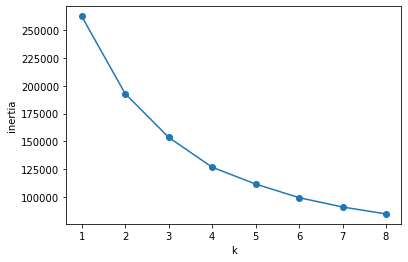

In [8]:
#模型构建
#导入k-means算法
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Inertia = []
for k in range(1,9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(features_scaler)
    Inertia.append(estimator.inertia_)#样本到最近的聚类中心的距离平方之和
X = range(1,9)
plt.xlabel('k')
plt.ylabel('inertia')
plt.plot(X,Inertia,'o-')
plt.show()

##### 手肘图可以看到，并没有所谓的“肘”点出现，inertia值基本上是随k值的增大逐渐减小的，在k=4,5这段区间变化放缓，这里设k=5。

In [9]:
#构建k-means模型，聚类中心数 n_clusters=5
kmodel = KMeans(n_clusters=5)
#训练模型
kmodel.fit(features_scaler)

KMeans(n_clusters=5)

In [10]:
#查看样本的类别标签
kmodel.labels_

array([3, 3, 3, ..., 1, 2, 0])

In [11]:
import numpy as np
#统计各个类别的数目
r1 = pd.Series(kmodel.labels_).value_counts()
#找出聚类中心
r2 = pd.DataFrame(kmodel.cluster_centers_)
# 所有簇中心点坐标值中最大值和最小值
max = r2.values.max()
min = r2.values.min()
#横向连接，得到聚类中心对应的类别下的数目
r = pd.concat([r2,r1],axis=1)
r

,0,1,2,3,4,0
0,-0.324093,1.546683,-0.630392,-0.590496,-0.164311,12050
1,-0.681628,-0.456518,-0.141958,-0.143560,-0.196041,20589
2,1.176918,-0.406601,-0.032869,-0.048243,-0.130552,12958
3,0.496901,-0.830301,2.453945,2.391011,0.263406,4553
4,0.180998,-0.079775,-0.088250,-0.072395,2.744500,2379


##### 5．绘制雷达图

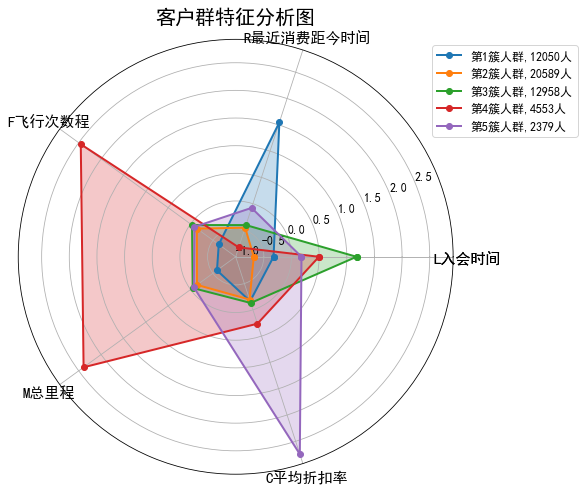

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# 绘制雷达图
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(10, 8))
# 以极坐标的形式绘制图形
ax = fig.add_subplot(111, polar=True)

# 设置特征标签名
feature_names = ["L入会时间", "R最近消费距今时间", "F飞行次数程", "M总里程", "C平均折扣率"]
# 特征数目
N = len(feature_names)
# 设置雷达图的角度，用于平分切开一个圆面
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
# 分割圆周长，并让其闭合
angles = np.concatenate((angles,[angles[0]]))
# 添加每个特征的标签名
labels = np.concatenate((feature_names,[feature_names[0]]))
ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=15)

# 获取聚类分析结果
center_num = r.values
# 绘制每类人群的折线图
for i, v in enumerate(center_num):
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    
# 添加标题
plt.title('客户群特征分析图', fontsize=20)
# 设置图例
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0))
# 显示图形
plt.show()